## Exercise meanshift
1. load 'data/iris_data.csv' into a dataframe (use decimal=',') and remove the 2 `Petal` columns. Now we are left with a 2D feature space
2. get unique labels (Species column)
3. plot with a scatter plot each iris flower sample colored by label (3 different colors)
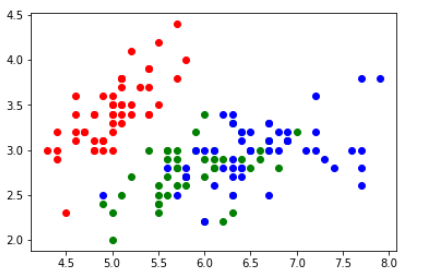
4. use: `MeanShift` and `estimate_bandwidth` from `sklearn.cluster` to first estimate bandwidth and then get the clusters (HINT: estimate_bandwidth() takes an argument: `quantile` set it to `0.2` for best result)
5. print out labels, cluster centers and number of clusters (as returned from the MeanShift function)
5. create a new scatter plot where each flower is colored according to cluster label
6. add a dot for the cluster centers
7. Compare the 2 plots (colored by actual labels vs. colored by cluster label)
8. Try changing the 'quantile' argument to 0.15 and see what happens to your cluster plot.

In [64]:
import pandas as pd
import numpy as np
from itertools import cycle
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth

def mean_shift(data, n_samples=1000):
    bandwidth = estimate_bandwidth(data, quantile=0.15, 
                                   n_samples=n_samples)

    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(data)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_

    labels_unique = np.unique(labels)
    n_clusters = len(labels_unique)
    
    return labels, cluster_centers, n_clusters

data = pd.read_csv('../data/iris_data.csv', decimal=',')

data.drop(['Petal width', 'Petal length'], axis='columns', inplace=True)
print('Assignment 1: \n')
print(data)
unique = np.unique(data['Species'])
print('Assignment 2: \n')
print(unique)

Assignment 1: 

     Sepal length  Sepal width       Species
0             5.1          3.5     I. setosa
1             4.9          3.0     I. setosa
2             4.7          3.2     I. setosa
3             4.6          3.1     I. setosa
4             5.0          3.6     I. setosa
..            ...          ...           ...
145           6.7          3.0  I. virginica
146           6.3          2.5  I. virginica
147           6.5          3.0  I. virginica
148           6.2          3.4  I. virginica
149           5.9          3.0  I. virginica

[150 rows x 3 columns]
Assignment 2: 

['I. setosa' 'I. versicolor' 'I. virginica']


Assignment 3: 



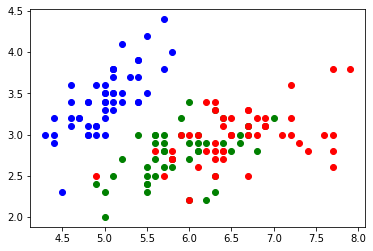

In [65]:
print('Assignment 3: \n')
colors = cycle('bgr')
for k, col in zip(unique, colors):
    mask = (data['Species'] == k)
    data_x, data_y = data['Sepal length'][mask], data['Sepal width'][mask]
    plt.scatter(data_x, data_y, color=col)

In [66]:
data_no_species = data.drop(['Species'], axis='columns')
labels, cluster_centers, n_clusters = mean_shift(data.drop(['Species'], axis='columns'))

print('Assignment 4 & 5: \n')
print('labels: \n', labels)
print('cluster_centers: \n', cluster_centers)
print('n_clusters: \n', n_clusters)

Assignment 4 & 5: 

labels: 
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 4 2 2 2 2 2 2 2 2 3 0 0 4 0 1 0 4 0 4 4 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 0 0 0 1 1 4 4 1 1 1 1 0 1 1 1 1 1 1 4 1 1 1 0 4 1 0 1 3 0 0 3 4 3 0 5 0
 0 0 1 1 0 0 5 3 1 0 1 3 0 0 3 1 1 0 3 3 5 0 0 1 3 0 0 1 0 0 0 1 0 0 0 1 0
 0 1]
cluster_centers: 
 [[6.4902439  3.01463415]
 [5.88055556 2.81388889]
 [4.96388889 3.375     ]
 [7.43333333 2.92222222]
 [4.94285714 2.38571429]
 [7.8        3.8       ]]
n_clusters: 
 6


Assignment 6: 



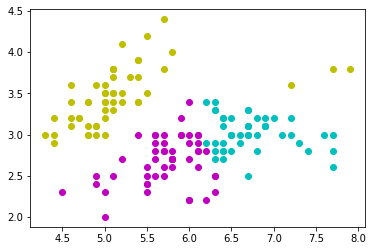

In [67]:
print('Assignment 6: \n')
data_no_species['cluster_label'] = labels

labels_unique = np.unique(labels)
colors = cycle('cmy')
for k, col in zip(np.unique(labels), colours):
    mask = (data_no_species['cluster_label'] == k)
    data_x, data_y = data['Sepal length'][mask], data['Sepal width'][mask]
    plt.scatter(data_x, data_y, color=col)

Assignment 7: 



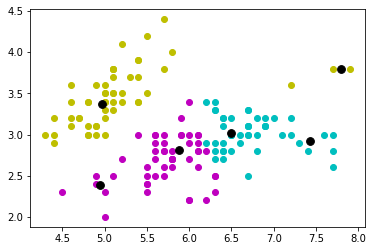

In [68]:
print('Assignment 7: \n')
colors = cycle('cmy')
for k, col in zip(np.unique(labels), colours):
    mask = (data_no_species['cluster_label'] == k)
    cluster_center = cluster_centers[k]
    data_x, data_y = data['Sepal length'][mask], data['Sepal width'][mask]
    plt.scatter(data_x, data_y, color=col)
    plt.scatter(cluster_center[0], cluster_center[1], s=60, c='k')

In [69]:
# Assignment 8:
# You can see some of the data overlapping with the actual colour labels. 
# When we swap to cluster labels the data overlapping will stay with the other cluster so data doesn't mix together.

In [70]:
# Assignment 9:
# With a quantile of 0.15 instead of 0.2 we can see additional clusters being made since data will be more spread